# Intduction to Machine Learning
This is a an introduction project and uses the house prices from Kaggle.com

## Phase 0
### importing Libaries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
train_df = pd.read_csv('train.csv')
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

Here there is some information about the dataset that's is going to help for the preprocessing phase. (phase 1)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
percetage_of_nonnull = train_df.count() / train_df.shape[0] * 100
percetage_of_nonnull.sort_values()

PoolQC           0.479452
MiscFeature      3.698630
Alley            6.232877
Fence           19.246575
FireplaceQu     52.739726
                  ...    
Exterior1st    100.000000
RoofMatl       100.000000
RoofStyle      100.000000
Foundation     100.000000
SalePrice      100.000000
Length: 81, dtype: float64

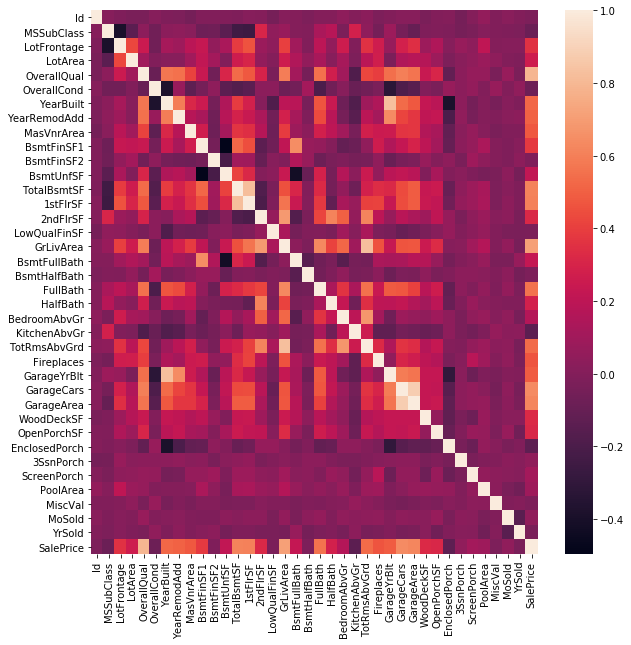

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr())

In [7]:
%%time
train_df.corr()['SalePrice'].sort_values(ascending=False)

Wall time: 13.5 ms


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

As you can see OverallQual, GrLivArea, GarageCars and GarageArea have the most correlation with SalePrice so these are most likely to have a significant impact on the price of a house.

In [8]:
train_df_pricelog = train_df.copy(True)
train_df_pricelog['SalePrice'] = np.log(train_df_pricelog['SalePrice'])
train_df_pricelog

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal  12.247694  
1         5   2007        WD         Normal  12.109011  
2         9   2008        WD         Normal  12.317167  
3         2   2006        WD        Abnorml  11.849398  
4        12   2008        WD         Normal  12.429216  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal  12.072541  
1456      2   2010        WD         Normal  12.254863  
1457      5   2010        WD         Normal  12.493130  
1458      4   2010        WD         Normal  11.864462  
1459      6   2008        WD         Normal  11.901583  

[1460 rows x 81 columns]

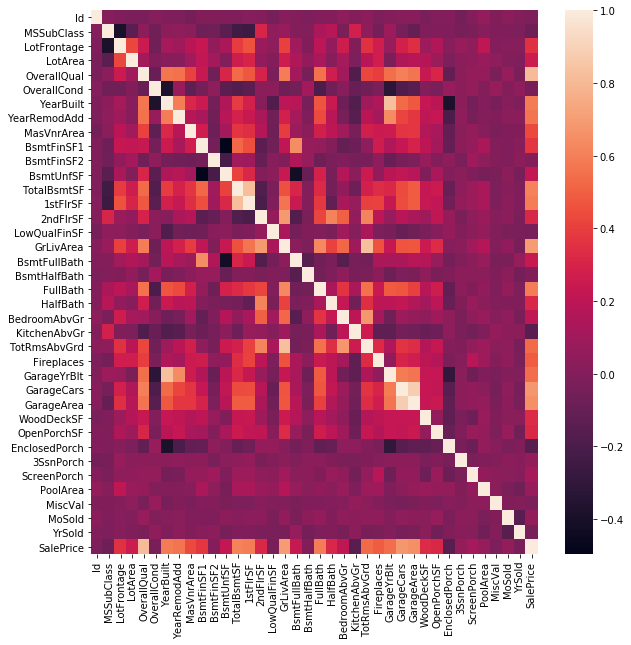

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df_pricelog.corr())

In [10]:
train_df_pricelog.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

As you see taking logarithm of the SalePrice col doesn't really change the corrlation values so we coclude that SalePrice doesn't have a exponensial relationship with any of these features and the relation is most likely to be linear

The four features that I mentioned in previous section has correlation between them like GarageCars and GarageArea so one of can be used and the other one can be omitted.


Here you can see the relation between sale price and other features

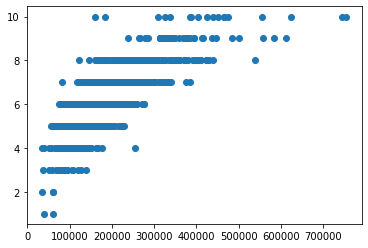

In [11]:
plt.scatter(train_df.SalePrice, train_df.OverallQual)

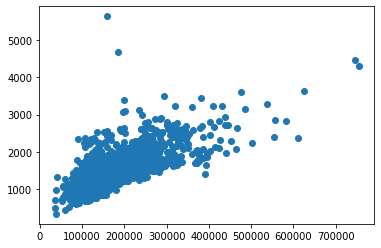

In [12]:
plt.scatter(train_df.SalePrice, train_df.GrLivArea)

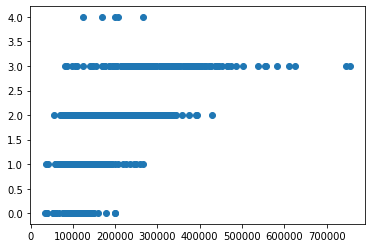

In [13]:
plt.scatter(train_df.SalePrice, train_df.GarageCars)

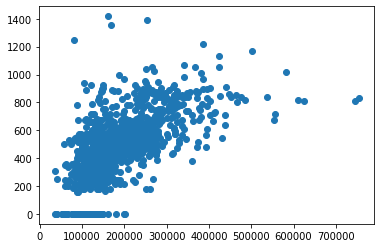

In [14]:
plt.scatter(train_df.SalePrice, train_df.GarageArea)

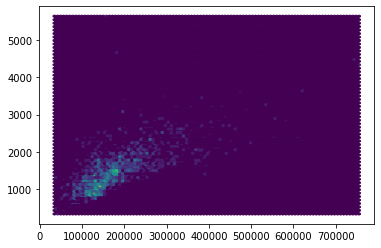

In [15]:
plt.hexbin(train_df.SalePrice, train_df.GrLivArea)

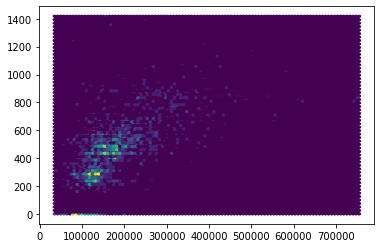

In [16]:
plt.hexbin(train_df.SalePrice, train_df.GarageArea)

In [17]:
print("Houses with price less than 100k : ", train_df.loc[train_df.SalePrice < 100000].shape[0] / train_df.shape[0] * 100)
print("Houses with price between 100k and 200k : ", train_df.loc[(train_df.SalePrice < 200000) & (train_df.SalePrice > 100000)].shape[0] / train_df.shape[0] * 100)
print("Houses with price between 200k and 400k : ", train_df.loc[(train_df.SalePrice > 200000) & (train_df.SalePrice < 300000)].shape[0] / train_df.shape[0] * 100)
print("Houses with price more than 300k : ", train_df.loc[(train_df.SalePrice > 300000)].shape[0] / train_df.shape[0] * 100)


Houses with price less than 100k :  7.808219178082192
Houses with price between 100k and 200k :  61.78082191780822
Houses with price between 200k and 400k :  21.36986301369863
Houses with price more than 300k :  7.876712328767123


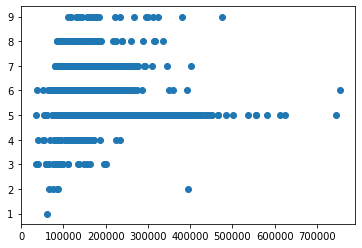

In [18]:
plt.scatter(train_df.SalePrice, train_df.OverallCond)

We did some examinations for getting familiar with the dataset and distribution of diffrent parameters. Now it's time to start the preprocessing phase for this dataset.

## Phase 1

Here we use median for filling missing data becuase it's not as sensetive to noise as mean and also doesn't result in float values for integer featurs.
other ways to handle missign data are deleting the column or the record completly which can't be good for small datasets or datasets with high rate of missing data.

Also we can use algorithems that support missing data and we can benefit from not having to handle missing data ourselves.

In [19]:
train_df.apply(lambda x: x.fillna(x.median, inplace=True) if x.dtype != 'O' else x)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Here we delete columns with very little correlation with SalePrice and also we delete Utilities column becuase most of records have the same value for this feature.

In [20]:
print(train_df.Utilities.describe())
preprocessed_train_df = train_df.drop(columns=['GarageYrBlt', '1stFlrSF', 'GarageArea', 'Utilities', 'Id'], axis=1)
col_names = []
for ind, value in preprocessed_train_df.corr()['SalePrice'].iteritems():
    if value < 0:
        col_names.append(ind)
print(col_names)
preprocessed_train_df = preprocessed_train_df.drop(columns=col_names, axis=1)
preprocessed_train_df

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold']


MSZoning LotFrontage  LotArea Street Alley LotShape LandContour  \
0          RL          65     8450   Pave   NaN      Reg         Lvl   
1          RL          80     9600   Pave   NaN      Reg         Lvl   
2          RL          68    11250   Pave   NaN      IR1         Lvl   
3          RL          60     9550   Pave   NaN      IR1         Lvl   
4          RL          84    14260   Pave   NaN      IR1         Lvl   
...       ...         ...      ...    ...   ...      ...         ...   
1455       RL          62     7917   Pave   NaN      Reg         Lvl   
1456       RL          85    13175   Pave   NaN      Reg         Lvl   
1457       RL          66     9042   Pave   NaN      Reg         Lvl   
1458       RL          68     9717   Pave   NaN      Reg         Lvl   
1459       RL          75     9937   Pave   NaN      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
0       Inside       Gtl      CollgCr  ...         0           0        0   
1          FR2       Gtl      Veenker  ...         0           0        0   
2       Inside       Gtl      CollgCr  ...         0           0        0   
3       Corner       Gtl      Crawfor  ...         0           0        0   
4          FR2       Gtl      NoRidge  ...         0           0        0   
...        ...       ...          ...  ...       ...         ...      ...   
1455    Inside       Gtl      Gilbert  ...         0           0        0   
1456    Inside       Gtl       NWAmes  ...         0           0        0   
1457    Inside       Gtl      Crawfor  ...         0           0        0   
1458    Inside       Gtl        NAmes  ...         0           0        0   
1459    Inside       Gtl      Edwards  ...         0           0        0   

     PoolQC  Fence  MiscFeature  MoSold SaleType SaleCondition SalePrice  
0       NaN    NaN          NaN       2       WD        Normal    208500  
1       NaN    NaN          NaN       5       WD        Normal    181500  
2       NaN    NaN          NaN       9       WD        Normal    223500  
3       NaN    NaN          NaN       2       WD       Abnorml    140000  
4       NaN    NaN          NaN      12       WD        Normal    250000  
...     ...    ...          ...     ...      ...           ...       ...  
1455    NaN    NaN          NaN       8       WD        Normal    175000  
1456    NaN  MnPrv          NaN       2       WD        Normal    210000  
1457    NaN  GdPrv         Shed       5       WD        Normal    266500  
1458    NaN    NaN          NaN       4       WD        Normal    142125  
1459    NaN    NaN          NaN       6       WD        Normal    147500  

[1460 rows x 67 columns]

As it's writen in the description of dataset na values can reffer to not having a certain feature so counting na values as lost and just omit the feature is not a good idea. we can replace this na value with None and then deal with the rest of the data.

Handeling categorical data have many methods.
We can assign an integer to each label and use LabelEncoding.

For data that has an order between different valuse we can assing an integer that somehow shows an order between the labels.

And we can use One-Hot encoding that is speceficly a better choice for decision tree model.

Here we use the first two methods.

In [21]:
col_names = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in col_names:
    preprocessed_train_df[col].fillna('None', inplace=True)
print(preprocessed_train_df['Electrical'].value_counts())
preprocessed_train_df['Electrical'].fillna(preprocessed_train_df['Electrical'].mode()[0], inplace=True)
print()
print(preprocessed_train_df.MasVnrType.describe())
preprocessed_train_df['MasVnrType'].fillna(preprocessed_train_df['MasVnrType'].mode()[0], inplace=True)
preprocessed_train_df.isna().sum().sum()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object


0

In [22]:
numeric_train_df = preprocessed_train_df.copy(deep=True)
print(preprocessed_train_df.LotShape.describe())
shape = {
    'Reg': 3,		
    'IR1': 2,
    'IR2': 1,
    'IR3': 0
}
numeric_train_df.LotShape = preprocessed_train_df.LotShape.map(shape)
numeric_train_df.LotShape.describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object


count    1460.000000
mean        2.591781
std         0.582296
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64

In [23]:
print(preprocessed_train_df.LandSlope.describe())
slope = {
    'Gtl': 3,
    'Mod': 2,
    'Sev': 1 
}
numeric_train_df.LandSlope = preprocessed_train_df.LandSlope.map(slope)
numeric_train_df.LandSlope.describe()

count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object


count    1460.000000
mean        2.937671
std         0.276232
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LandSlope, dtype: float64

In [46]:
quality = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0
}
col_names = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
for col in col_names:
    numeric_train_df[col] = preprocessed_train_df[col].map(quality)
numeric_train_df.drop('LotFrontage', axis=1, inplace=True)
numeric_train_df.drop('MasVnrArea', axis=1, inplace=True)
numeric_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   LotArea        1460 non-null   int64 
 2   Street         1460 non-null   int32 
 3   Alley          1460 non-null   int32 
 4   LotShape       1460 non-null   int64 
 5   LandContour    1460 non-null   int32 
 6   LotConfig      1460 non-null   int32 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int32 
 9   Condition1     1460 non-null   int32 
 10  Condition2     1460 non-null   int32 
 11  BldgType       1460 non-null   int32 
 12  HouseStyle     1460 non-null   int32 
 13  OverallQual    1460 non-null   int64 
 14  YearBuilt      1460 non-null   int64 
 15  YearRemodAdd   1460 non-null   int64 
 16  RoofStyle      1460 non-null   int32 
 17  RoofMatl       1460 non-null   int32 
 18  Exterior1st    1460 non-null

In [48]:
for col in numeric_train_df.columns:
    if numeric_train_df[col].dtypes == 'object':
        encode = LabelEncoder()
        encode.fit(numeric_train_df[col].values)
        numeric_train_df[col] = encode.transform(numeric_train_df[col].values)

In [51]:
numeric_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   Street         1460 non-null   int32
 3   Alley          1460 non-null   int32
 4   LotShape       1460 non-null   int64
 5   LandContour    1460 non-null   int32
 6   LotConfig      1460 non-null   int32
 7   LandSlope      1460 non-null   int64
 8   Neighborhood   1460 non-null   int32
 9   Condition1     1460 non-null   int32
 10  Condition2     1460 non-null   int32
 11  BldgType       1460 non-null   int32
 12  HouseStyle     1460 non-null   int32
 13  OverallQual    1460 non-null   int64
 14  YearBuilt      1460 non-null   int64
 15  YearRemodAdd   1460 non-null   int64
 16  RoofStyle      1460 non-null   int32
 17  RoofMatl       1460 non-null   int32
 18  Exterior1st    1460 non-null   int32
 19  Exteri

Values of different features have different ranges and features with greater range can effect more in the decision process of the model although it's not more imortant than other features so normalaizng will even the effect of each feature on the final result.

In [63]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(numeric_train_df)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = numeric_train_df.columns
normalized_df.describe()

MSZoning      LotArea       Street        Alley     LotShape  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.757192     0.043080     0.995890     0.496918     0.863927   
std       0.158004     0.046653     0.063996     0.124833     0.194099   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.029229     1.000000     0.500000     0.666667   
50%       0.750000     0.038227     1.000000     0.500000     1.000000   
75%       0.750000     0.048150     1.000000     0.500000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       LandContour    LotConfig    LandSlope  Neighborhood   Condition1  ...  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  ...   
mean      0.925799     0.754795     0.968836      0.510474     0.253938  ...   
std       0.235889     0.405659     0.138116      0.250572     0.108564  ...   
min       0.000000     0.000000     0.000000      0.000000     0.000000  ...   
25%       1.000000     0.500000     1.000000      0.291667     0.250000  ...   
50%       1.000000     1.000000     1.000000      0.500000     0.250000  ...   
75%       1.000000     1.000000     1.000000      0.708333     0.250000  ...   
max       1.000000     1.000000     1.000000      1.000000     1.000000  ...   

         3SsnPorch  ScreenPorch     PoolArea       PoolQC        Fence  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.006712     0.031377     0.003738     0.003562     0.876199   
std       0.057711     0.116161     0.054441     0.053790     0.270728   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     0.000000     0.000000     1.000000   
75%       0.000000     0.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       MiscFeature       MoSold     SaleType  SaleCondition    SalePrice  
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  
mean      0.267295     0.483811     0.939127       0.754110     0.202779  
std       0.093026     0.245784     0.194013       0.220171     0.110321  
min       0.000000     0.000000     0.000000       0.000000     0.000000  
25%       0.250000     0.363636     1.000000       0.800000     0.132030  
50%       0.250000     0.454545     1.000000       0.800000     0.177892  
75%       0.250000     0.636364     1.000000       0.800000     0.248715  
max       1.000000     1.000000     1.000000       1.000000     1.000000  

[8 rows x 65 columns]

After changing the type of every column to numeric we can eliminate the column which have vary little correlation with SalePrice. Doing this will increase the perfomance of the model and just keep the most important features to decide with.

In [156]:
smaller_df = numeric_train_df.copy()
corrs = numeric_train_df.corr().SalePrice
number = 0
for col in numeric_train_df.columns:
    if corrs[col] < 0.1:
        smaller_df.drop(col, axis = 1, inplace = True)
        number += 1
print(number)
smaller_df

23


LotArea  Neighborhood  HouseStyle  OverallQual  YearBuilt  YearRemodAdd  \
0        8450             5           5            7       2003          2003   
1        9600            24           2            6       1976          1976   
2       11250             5           5            7       2001          2002   
3        9550             6           5            7       1915          1970   
4       14260            15           5            8       2000          2000   
...       ...           ...         ...          ...        ...           ...   
1455     7917             8           5            6       1999          2000   
1456    13175            14           2            6       1978          1988   
1457     9042             6           5            7       1941          2006   
1458     9717            12           2            5       1950          1996   
1459     9937             7           2            5       1965          1965   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  ...  GarageQual  \
0             1         1           12           13  ...           3   
1             1         1            8            8  ...           3   
2             1         1           12           13  ...           3   
3             1         1           13           15  ...           3   
4             1         1           12           13  ...           3   
...         ...       ...          ...          ...  ...         ...   
1455          1         1           12           13  ...           3   
1456          1         1            9           10  ...           3   
1457          1         1            5            5  ...           3   
1458          3         1            8            8  ...           3   
1459          1         1            6            6  ...           3   

      GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  ScreenPorch  PoolQC  \
0              3           2           0           61            0       0   
1              3           2         298            0            0       0   
2              3           2           0           42            0       0   
3              3           2           0           35            0       0   
4              3           2         192           84            0       0   
...          ...         ...         ...          ...          ...     ...   
1455           3           2           0           40            0       0   
1456           3           2         349            0            0       0   
1457           3           2           0           60            0       0   
1458           3           2         366            0            0       0   
1459           3           2         736           68            0       0   

      Fence  SaleCondition  SalePrice  
0         4              4     208500  
1         4              4     181500  
2         4              4     223500  
3         4              0     140000  
4         4              4     250000  
...     ...            ...        ...  
1455      4              4     175000  
1456      2              4     210000  
1457      0              4     266500  
1458      4              4     142125  
1459      4              4     147500  

[1460 rows x 42 columns]

There isn't a rule for the value of P but keeping 75 to 85 percent of dataset for training the model can be a good choice the value highly depends of the size of the dataset. If it is small most of data should be used for training the model and if it is too large keeping the size of train dataset small can decrease the cost of training the model.

Since we are going to evaluate our model with the train dataset it is important to not just pick records with similar features and using random selection can eliminate the possibility of having a dataset with specific features. 

In [188]:
train, test = train_test_split(smaller_df, train_size = 0.8)
train_x = train.drop('SalePrice', axis = 1)
train_y = train.SalePrice
test_x = test.drop('SalePrice', axis = 1)
test_y = test.SalePrice
print("Train ratio: ", train_x.shape[0] / numeric_train_df.shape[0] * 100, " %")

Train ratio:  80.0  %


## Phase 2
Here three different method including knn, linear regression and decision tree to determine the price of each house in the test dataset.

In [158]:
def get_error(ans, pre):
    mae = MAE(ans, pre)
    rmse = MSE(ans, pre, squared=False)
    return mae, rmse

In [189]:
linear_reg = LinearRegression() 
linear_reg.fit(train_x, train_y)
mae, rmse = get_error(test_y, linear_reg.predict(test_x))
print("Linear Rgression results: ")
print("MAE: ", mae)
print("RMSE", rmse)

Linear Rgression results: 
MAE:  21661.067035502034
RMSE 29380.168638698433


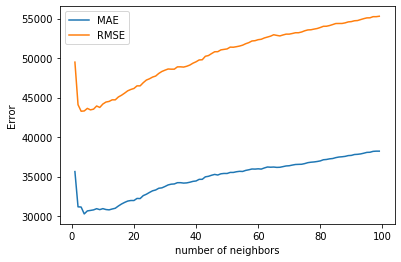

In [215]:
mae_list = []
rmse_list = []
for i in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(train_x, train_y)
    mae, rmse = get_error(test_y, knn.predict(test_x))
    mae_list.append(mae)
    rmse_list.append(rmse)

x = [i for i in range(1, 100)]
plt.plot(x,mae_list, label='MAE')
plt.plot(x,rmse_list, label='RMSE')
plt.xlabel('number of neighbors')
plt.ylabel('Error')
plt.legend()
plt.show()

In [201]:
knn = KNeighborsRegressor()
param_grid = { 'n_neighbors': [i for i in range(1, 100)] }
optimazer_knn = GridSearchCV(knn, param_grid, n_jobs=-1)
optimazer_knn.fit(train_x, train_y)
mae, rms = get_error(test_y, optimazer_knn.predict(test_x))
print("KNN results: ")
print("MAE: ", mae) 
print("RMSE: ", rms)

KNN results: 
MAE:  30644.566438356167
RMSE:  43629.38118469382


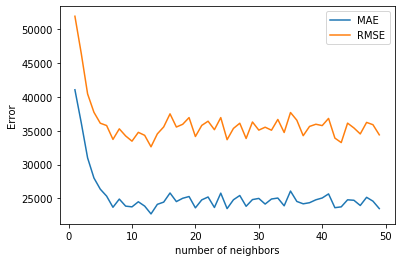

In [218]:
mae_list = []
rmse_list = []
for i in range(1, 50):
    knn = DecisionTreeRegressor(max_depth=i)
    knn.fit(train_x, train_y)
    mae, rmse = get_error(test_y, knn.predict(test_x))
    mae_list.append(mae)
    rmse_list.append(rmse)

x = [i for i in range(1, 50)]
plt.plot(x,mae_list, label='MAE')
plt.plot(x,rmse_list, label='RMSE')
plt.xlabel('number of neighbors')
plt.ylabel('Error')
plt.legend()
plt.show()

In [191]:
dt = DecisionTreeRegressor()
param_grid = { 'max_depth': [i for i in range(1, 50)] }
optimazer_dt = GridSearchCV(dt, param_grid, n_jobs=-1)
optimazer_dt.fit(train_x, train_y)
mae, rms = get_error(test_y, optimazer_dt.predict(test_x))
print("Decision Tree results: ")
print("MAE: ", mae)
print("RMSE: ", rms)

Decision Tree results: 
MAE:  26372.015210739497
RMSE:  36101.151321137644


Overfitting is a condition that our model was trained very specificly for the train dataset that captured every mislead data that is in the dataset and this can degrade the perfomance of model when countering a new data.

In [193]:
train_mae, train_rms = get_error(train_y, linear_reg.predict(train_x))
test_mae, test_rms = get_error(test_y, linear_reg.predict(test_x))
print("Linear REgression")
print("train errors: ")
print("\tMAE\t\t\tRMSE")
print("\t", train_mae, "\t", train_rms)
print("test errors: ")
print("\tMAE\t\t\tRMSE")
print("\t", test_mae, "\t", test_rms)

Linear REgression
train errors: 
	MAE			RMSE
	 21090.646472625733 	 34797.88053465597
test errors: 
	MAE			RMSE
	 21661.067035502034 	 29380.168638698433


In [194]:
train_mae, train_rms = get_error(train_y, optimazer_knn.predict(train_x))
test_mae, test_rms = get_error(test_y, optimazer_knn.predict(test_x))
print("KNN")
print("train errors: ")
print("\tMAE\t\t\tRMSE")
print("\t", train_mae, "\t", train_rms)
print("test errors: ")
print("\tMAE\t\t\tRMSE")
print("\t", test_mae, "\t", test_rms)

KNN
train errors: 
	MAE			RMSE
	 25392.090582191777 	 40640.1303207579
test errors: 
	MAE			RMSE
	 30644.566438356167 	 43629.38118469382


In [195]:
train_mae, train_rms = get_error(train_y, optimazer_dt.predict(train_x))
test_mae, test_rms = get_error(test_y, optimazer_dt.predict(test_x))
print("Decision Tree")
print("train errors: ")
print("\tMAE\t\t\tRMSE")
print("\t", train_mae, "\t", train_rms)
print("test errors: ")
print("\tMAE\t\t\tRMSE")
print("\t", test_mae, "\t", test_rms)

Decision Tree
train errors: 
	MAE			RMSE
	 21773.1262199936 	 29761.422115017955
test errors: 
	MAE			RMSE
	 26372.015210739497 	 36101.151321137644


According the above results knn model might be underfit becuase its performance isn't good enough fot the train dataset. And decision tree model could be overfit becuase the gap between results of train and test dataset is a little more than it should be.

Fot testing the result of preprocess I tested the models with numeric_tarin_df, smaller_df and normalaized_df and the best result was taken with smaller_df becuase of smaller number of features that is effected on the result and dealing with each column as it should be when we changed the categorical features into numeric values.

## Phase 3
As the last step in order to get the best results out of previously used models we combine them using methods like Random Forest and Voting Regression to get the minimum error.

### Random Forest

In [205]:
rf = RandomForestRegressor()
param_grid = {
    'max_depth': [i for i in range(3, 10)],
    'n_estimators': [100, 200, 300]
}
optimazer_rf = GridSearchCV(rf, param_grid, n_jobs=-1, verbose=True)
optimazer_rf.fit(train_x, train_y)
mae, rms = get_error(test_y, optimazer_rf.predict(test_x))
print("Random Forest results: ")
print("MAE: ", mae)
print("RMSE: ", rms)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   21.6s finished
Random Forest results: 
MAE:  18111.760752576258
RMSE:  26127.405617811462


### Voting Regression

In [209]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(train_x, train_y)
mae, rms = get_error(test_y, knn.predict(test_x))
print("KKN without optimazing: ")
print("MAE: ", mae)
print("RMSE: ", rms)

KKN without optimazing: 
MAE:  30927.67594178082
RMSE:  43932.821049140206


In [210]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(train_x, train_y)
mae, rms = get_error(test_y, dt.predict(test_x))
print("Decision Tree without optimazing: ")
print("MAE: ", mae)
print("RMSE: ", rms)

Decision Tree without optimazing: 
MAE:  24790.75834084096
RMSE:  35991.02915651135


In [211]:
vr = VotingRegressor([('LG', linear_reg), ('KNN', knn), ('DT', dt)])
vr.fit(train_x, train_y)
mae, rms = get_error(test_y, vr.predict(test_x))
print("Voting Regression results: ")
print("MAE: ", mae)
print("RMSE: ", rms)

Voting Regression results: 
MAE:  20353.30182770129
RMSE:  29471.244117101265


The advantage of using ensemble models is that each model has its own strength and weaknesses and combining the result of a few models that cover each others weaknesses can lead to a very accurate model that perform well in every different situations. This 